In [1]:
setwd('/import/jliu/data2/scrna/')
library(cellcall)
scRNA = readRDS('scRNA.rds')
library(Seurat)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire i

### T细胞注释

In [4]:
table(scRNA$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         25         258         691       52055        2210 

In [5]:
table(scRNA$group)


   CI   Con 
34017 21222 

In [6]:
Idents(scRNA) = 'celltype'

In [7]:
sc = subset(scRNA,idents = c('T_cells','NK_cell'))

In [8]:
library(Seurat)

In [32]:
scRNAlist =  SplitObject(sc, split.by = "orig.ident")
scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
DefaultAssay(scRNA_harmony) = 'RNA'
library(harmony)
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.2)
##作图

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  2.522   5.340   1.652 

16:51:58 UMAP embedding parameters a = 0.9922 b = 1.112

16:51:58 Read 2901 rows and found 30 numeric columns

16:51:58 Using Annoy for neighbor search, n_neighbors = 30

16:51:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:51:58 Writing NN index file to temp file /tmp/Rtmpt3PXTK/file345176017b865

16:51:58 Searching Annoy index using 1 thread, search_k = 3000

16:51:59 Annoy recall = 100%

16:52:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:52:01 Initializing from normalized Laplacian + noise (using irlba)

16:52:01 Commencing optimization for 500 epochs, with 124018 positive edges

16:52:09 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2901
Number of edges: 151344

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9162
Number of communities: 4
Elapsed time: 0 seconds


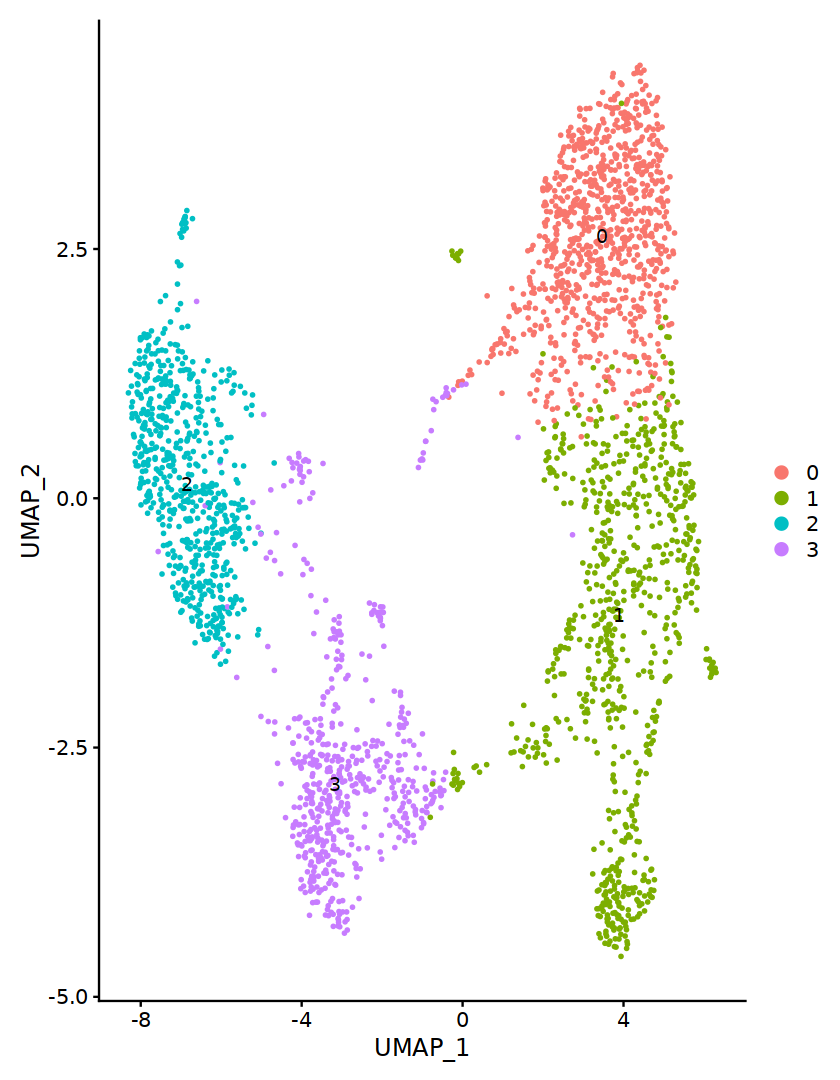

In [33]:
DimPlot(scRNA_harmony, reduction = "umap", label=T) 

In [34]:
library(ggplot2)

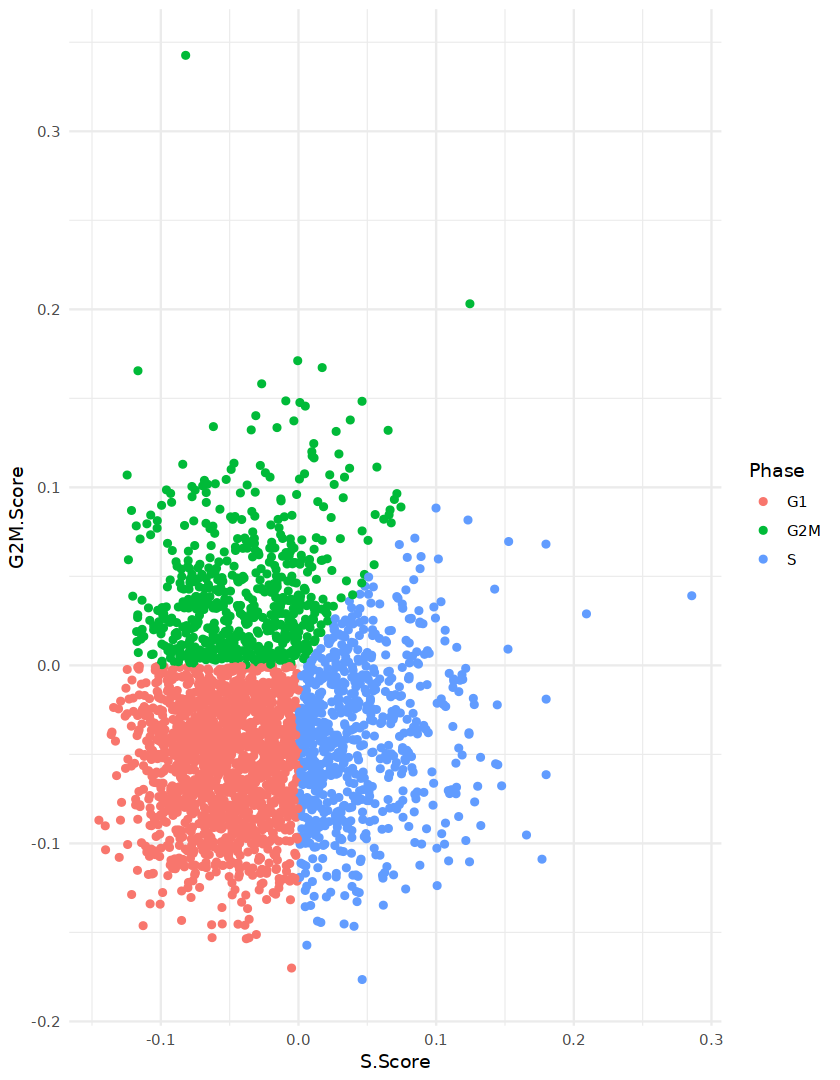

In [35]:
test.seu = scRNA_harmony
s.genes=Seurat::cc.genes.updated.2019$s.genes
g2m.genes=Seurat::cc.genes.updated.2019$g2m.genes
test.seu <- CellCycleScoring(test.seu, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
test.seu@meta.data  %>% ggplot(aes(S.Score,G2M.Score))+geom_point(aes(color=Phase))+
    theme_minimal()

In [36]:
Idents(test.seu) = 'seurat_clusters'

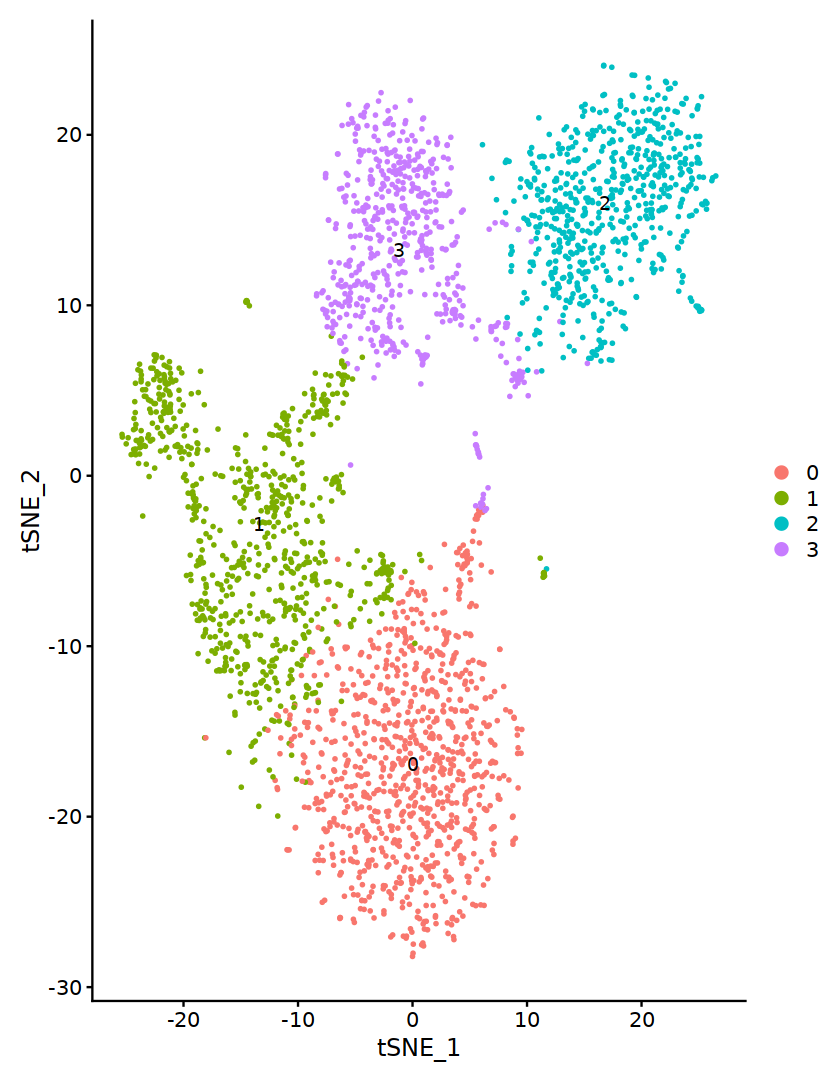

In [37]:
DimPlot(test.seu,reduction = "tsne",label = T)

In [38]:
Idents(test.seu) = 'seurat_clusters'
DefaultAssay(test.seu) = 'RNA'
sce.markers <- FindAllMarkers(object = test.seu, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

# library(dplyr) 
# # 不同seurat版本的 avg_logFC 不一样 
# top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [40]:
sce.markers %>%  dplyr::filter(cluster == 1)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCR4,1.113214e-118,1.0431850,0.271,0.008,4.173104e-114,1,CCR4
AQP3,1.205776e-116,1.4082302,0.564,0.152,4.520091e-112,1,AQP3
BIRC3,3.534602e-104,1.3224719,0.658,0.245,1.325016e-99,1,BIRC3
DUSP16,1.686813e-101,1.1794942,0.446,0.096,6.323356e-97,1,DUSP16
LTB1,1.733054e-89,1.1399642,0.790,0.410,6.496699e-85,1,LTB
LIMS1,5.186902e-88,1.3071956,0.569,0.206,1.944414e-83,1,LIMS1
CD28,9.577094e-84,1.0157201,0.501,0.148,3.590165e-79,1,CD28
GPR183,1.311402e-83,1.1401198,0.509,0.157,4.916053e-79,1,GPR183
MAF,2.618854e-79,1.4840710,0.624,0.290,9.817296e-75,1,MAF


In [ ]:
sce.markers

In [41]:
top5 <- sce.markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


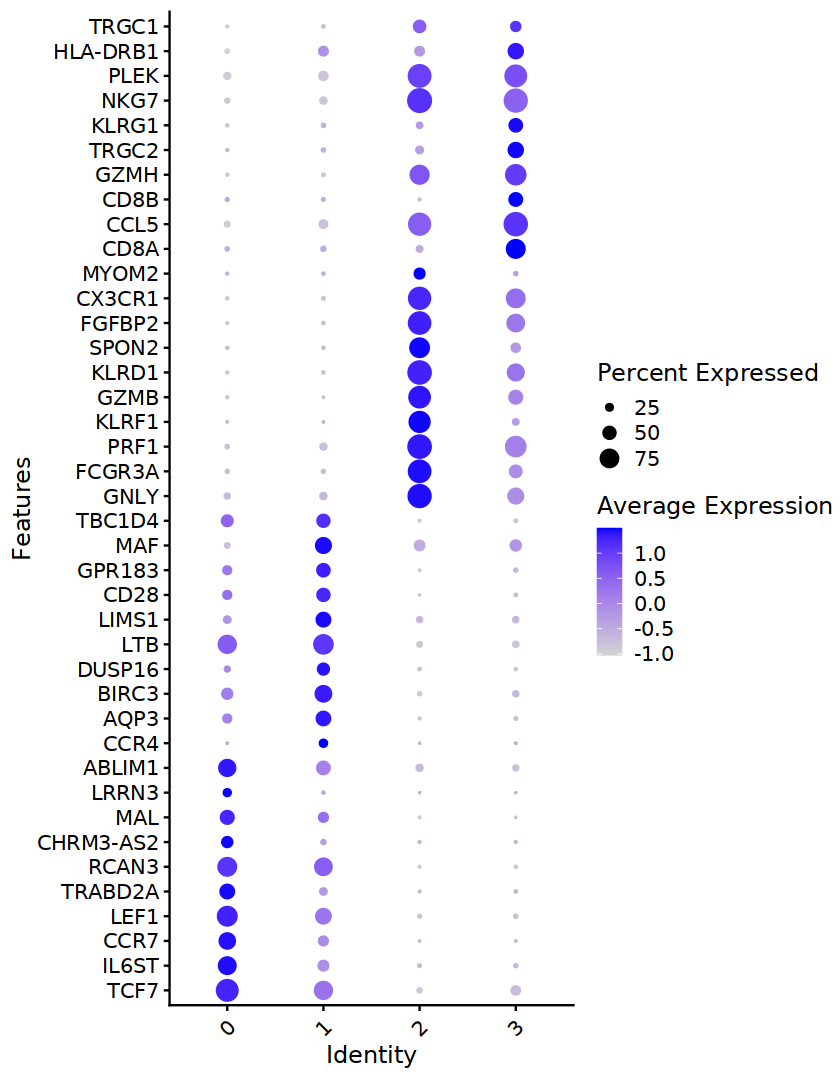

In [42]:
options(repr.plot.height = 9,repr.plot.width = 7)

 DotPlot(test.seu, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

#ggsave(file = '../figure/fig.macro.marker.doc.pdf',width = 6,height = 9)

#write.csv(sce.markers,file = 'macro.sce.marker.csv')

In [48]:
unique(test.seu$seurat_clusters)

[1] 2 0 3 1
Levels: 0 1 2 3

In [ ]:
# 0 CD4_TN
# 1 treg
# 2 NK
# 3 cd8tem

In [58]:
celltype = data.frame(ClusterID=c(0,1,2,3), celltype=c('CD4_tn','treg','NK','cd8_tem'), stringsAsFactors = FALSE)

In [59]:
test.seu@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  test.seu@meta.data[which(test.seu@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [60]:
table(test.seu$celltype)


 CD4_tn      NK cd8_tem    treg 
    903     646     572     780 

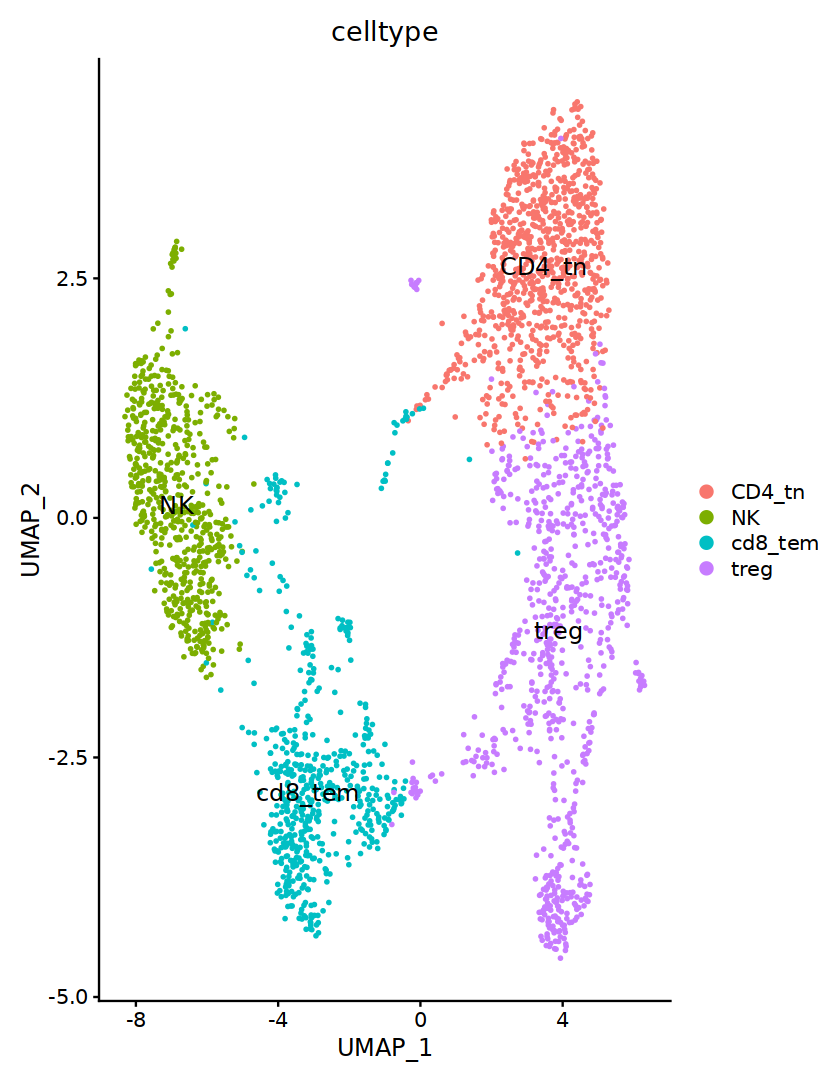

In [62]:
DimPlot(test.seu, group.by="celltype", label=T, label.size=5, reduction='umap')

In [63]:
saveRDS(test.seu,file= 'after_t.rds')

In [2]:
test.seu  = readRDS('after_t.rds')

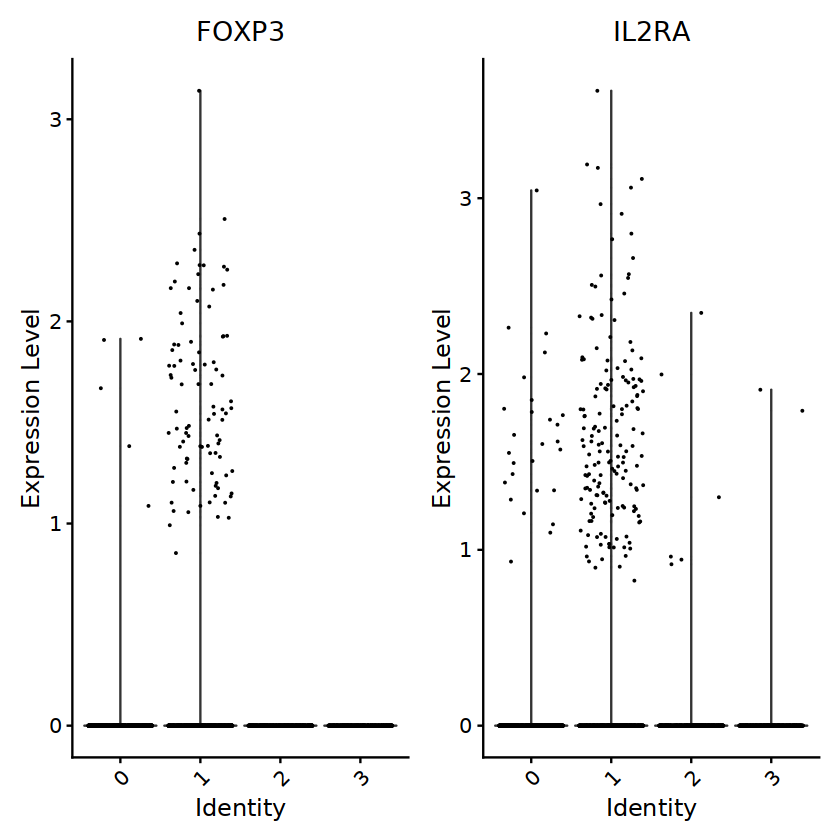

In [5]:
VlnPlot(test.seu,features = c('FOXP3','IL2RA'))